## ДЗ №4 “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
y = pd.DataFrame(target, columns=["MEDV"])

print(X.head())
print(y.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Вывод результатов для проверки
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (404, 13)
X_test_scaled shape: (102, 13)


In [4]:
from sklearn.manifold import TSNE

# Построение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Вывод результатов для проверки
print("X_train_tsne shape:", X_train_tsne.shape)

X_train_tsne shape: (404, 2)


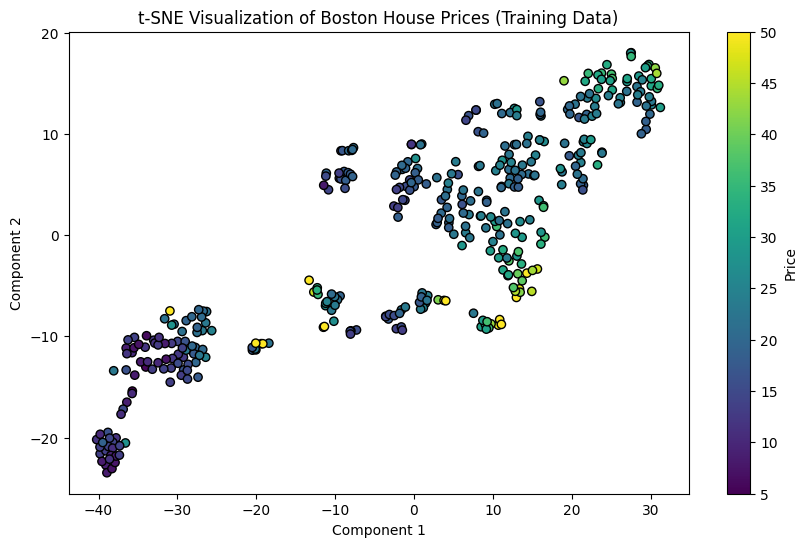

In [5]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train.values.ravel(), cmap='viridis', marker='o', edgecolor='k')
plt.colorbar(label='Price')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Visualization of Boston House Prices (Training Data)')
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Cluster labels: [0 1 2 0 1 1 1 2 0 0 1 1 1 0 1 1 1 2 1 2 0 1 2 1 2 1 0 2 1 2 1 1 0 0 1 2 2
 1 1 2 2 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 2 1 0 0 0 0 2 1 0 0 0 2 0 1 1 0 0 2 2 1 0 0 1 0 1 2 2 2 1 1 2 1 1 1 0
 2 1 2 2 0 0 0 1 1 1 0 0 1 2 0 0 2 2 0 2 1 1 1 1 0 1 2 1 0 1 0 1 1 1 0 1 1
 1 1 1 0 2 1 2 0 0 0 0 0 2 1 0 1 0 2 2 1 2 1 1 2 2 0 2 2 0 0 2 1 1 1 0 1 0
 0 2 2 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 2 1 1 1 1 2 1 0 1 0 2 0 1 0 0 0
 0 1 1 2 2 1 2 1 0 1 1 1 1 1 0 0 2 1 1 2 2 0 0 1 2 0 0 1 2 2 0 1 2 0 1 1 0
 1 0 1 1 2 1 1 1 1 1 1 2 0 1 0 1 1 2 1 0 0 2 0 1 0 1 1 0 2 2 1 0 2 0 0 0 1
 2 0 1 1 1 1 1 1 0 2 1 0 2 2 1 2 1 2 1 0 2 1 1 1 2 0 1 0 0 1 0 2 1 1 0 1 0
 0 1 1 0 2 1 1 2 1 1 1 0 1 1 1 1 0 1 0 1 2 2 0 2 0 1 0 2 1 0 2 1 2 1 2 1 2
 1 1 0 1 2 0 2 0 1 0 2 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 1 1 1 2 0 1]


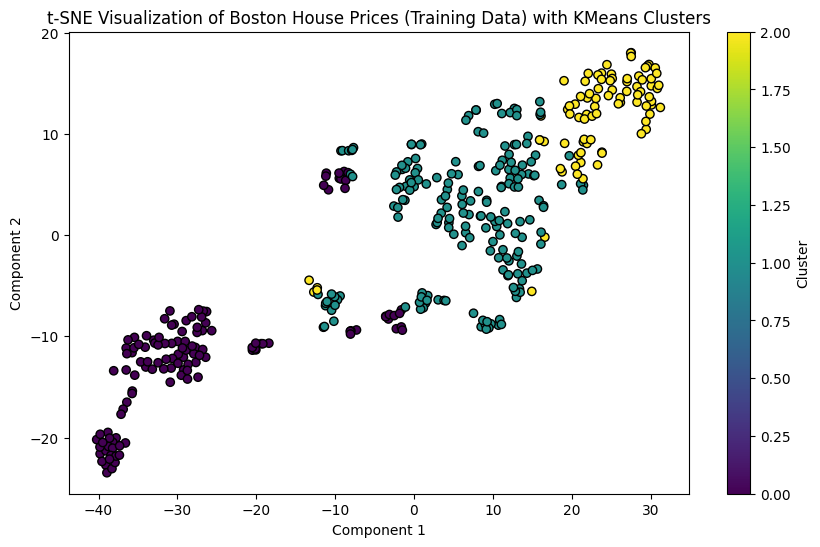

In [8]:
from sklearn.cluster import KMeans

# Создание и обучение модели KMeans с явным указанием n_init
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

# Получение меток кластеров для тренировочных данных
cluster_labels = kmeans.labels_

# Вывод результатов для проверки
print("Cluster labels:", cluster_labels)

# Построение диаграммы рассеяния с кластерами
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.colorbar(label='Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Visualization of Boston House Prices (Training Data) with KMeans Clusters')
plt.show()

### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

             price       CRIM
cluster                      
0        17.392308   8.469302
1        23.911594   0.246421
2        12.814286  19.021666


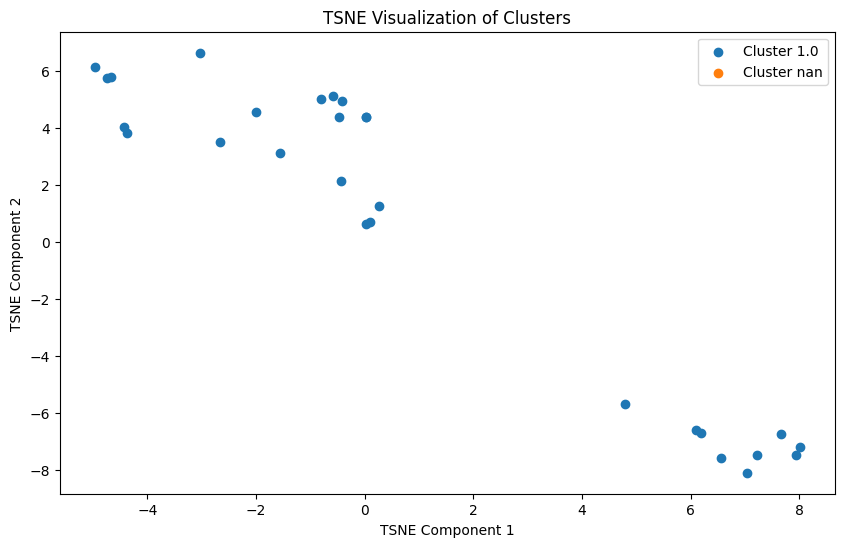

In [20]:
# Загрузка данных
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
y = pd.DataFrame(target, columns=["MEDV"])

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42, n_init=10)
kmeans.fit(X_train)

# Применение модели KMeans к тестовым данным
X_test['cluster'] = kmeans.predict(X_test)

# Добавление целевой переменной к тестовым данным
X_test['price'] = y_test.values

# Вычисление средних значений price и CRIM по кластерам
cluster_means = X_test.groupby('cluster')[['price', 'CRIM']].mean()
print(cluster_means)

# Применение TSNE для визуализации
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test.drop(columns=['cluster', 'price']))

# Добавление результатов TSNE и кластеров в DataFrame
X_tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
X_tsne_df['cluster'] = X_test['cluster']

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
for cluster in X_tsne_df['cluster'].unique():
    cluster_data = X_tsne_df[X_tsne_df['cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}')

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend()
plt.title('TSNE Visualization of Clusters')
plt.show()
